In [51]:
# https://github.com/youngmihuang/lyrics_application
# https://pypi.org/project/GoogleNews/

from GoogleNews import GoogleNews

import requests 
from bs4 import BeautifulSoup
import pandas as pd

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()


x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get__links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
#     print(n+1)
    print(result[n])
    print(links[n])
   

df = pd.DataFrame(
{
    '標題': result,
    '連結': links
})
 
df


請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:股票

中國：全面實行股票註冊制 建立常態化退市機制
https://tw.stock.yahoo.com/news/%E4%B8%AD%E5%9C%8B-%E5%85%A8%E9%9D%A2%E5%AF%A6%E8%A1%8C%E8%82%A1%E7%A5%A8%E8%A8%BB%E5%86%8A%E5%88%B6-%E5%BB%BA%E7%AB%8B%E5%B8%B8%E6%85%8B%E5%8C%96%E9%80%80%E5%B8%82%E6%A9%9F%E5%88%B6-141201898.html
趣blogblog︱李嘉誠一生最偉大投資Vs輸九成的股票（股榮）
https://hk.appledaily.com/finance/20201031/JWEXRPHQ3FDWPNQ6IH6ATHITF4/
桂浩明談白馬股"閃崩":業績很好的股票也不能無限制地推高估值-財經新聞
https://news.sina.com.tw/article/20201031/36747016.html
【公告】國泰金代子公司國泰人壽取得螞蟻科技集團股份有限公司(6688 HK)首次公開發行之股票(IPO)
https://tw.stock.yahoo.com/news/%E5%85%AC%E5%91%8A-%E5%9C%8B%E6%B3%B0%E9%87%91%E4%BB%A3%E5%AD%90%E5%85%AC%E5%8F%B8%E5%9C%8B%E6%B3%B0%E4%BA%BA%E5%A3%BD%E5%8F%96%E5%BE%97%E8%9E%9E%E8%9F%BB%E7%A7%91%E6%8A%80%E9%9B%86%E5%9C%98%E8%82%A1%E4%BB%BD%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8-6688-hk-%E9%A6%96%E6%AC%A1%E5%85%AC%E9%96%8B%E7%99%BC%E8%A1%8C%E4%B9%8B%E8%82%A1%E7%A5%A8-122031966.html
〈美股盤後〉美單日確診飆新高！道瓊週跌逾6% 創3月以來最糟
https://news.cnyes.com/news/id/4537393
蔚來今年瘋漲660% 匯豐喊冷靜！目標

,標題,連結
0,中國：全面實行股票註冊制 建立常態化退市機制,https://tw.stock.yahoo.com/news/%E4%B8%AD%E5%9...
1,趣blogblog︱李嘉誠一生最偉大投資Vs輸九成的股票（股榮）,https://hk.appledaily.com/finance/20201031/JWE...
2,"桂浩明談白馬股""閃崩"":業績很好的股票也不能無限制地推高估值-財經新聞",https://news.sina.com.tw/article/20201031/3674...
3,【公告】國泰金代子公司國泰人壽取得螞蟻科技集團股份有限公司(6688 HK)首次公開發行之股...,https://tw.stock.yahoo.com/news/%E5%85%AC%E5%9...
4,〈美股盤後〉美單日確診飆新高！道瓊週跌逾6% 創3月以來最糟,https://news.cnyes.com/news/id/4537393
5,蔚來今年瘋漲660% 匯豐喊冷靜！目標價30美元已略低現行股價,https://news.cnyes.com/news/id/4537413
6,散戶注意！股票套牢不是等死 還有1招能賺錢,https://www.chinatimes.com/realtimenews/202010...
7,微軟讓Excel加入更多類型資料,https://www.ithome.com.tw/news/140859
8,環球股市周挫逾5% 大選前美股基金單周走資569億,https://hk.on.cc/hk/bkn/cnt/finance/20201031/b...
9,公募基金和私募大佬在精選層投了哪些公司？-財經新聞,https://news.sina.com.tw/article/20201031/3674...


In [52]:

url = df['連結'][0]
print(url)


user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}


r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html')


articleContent = soup.find_all('p')
articleContent

https://tw.stock.yahoo.com/news/%E4%B8%AD%E5%9C%8B-%E5%85%A8%E9%9D%A2%E5%AF%A6%E8%A1%8C%E8%82%A1%E7%A5%A8%E8%A8%BB%E5%86%8A%E5%88%B6-%E5%BB%BA%E7%AB%8B%E5%B8%B8%E6%85%8B%E5%8C%96%E9%80%80%E5%B8%82%E6%A9%9F%E5%88%B6-141201898.html


[<p class="canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm" content="（中央社台北31日電）中國國務院金融穩定發展委員會今天召開專題會議，要求按照五中全會戰略部署，做好金融改革開放各項工作，包括「全面實行股票發行註冊制、建立常態化退市機制」等。" type="text">（中央社台北31日電）中國國務院金融穩定發展委員會今天召開專題會議，要求按照五中全會戰略部署，做好金融改革開放各項工作，包括「全面實行股票發行註冊制、建立常態化退市機制」等。</p>,
 <p class="canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm" content="據中國政府網晚間刊發的通稿，這場會議由中國國務院副總理、金融委主任劉鶴主持。會議強調，要按照中共第19屆中央委員會第五次全體會議做出的戰略部署，做好金融改革開放各項工作。" type="text">據中國政府網晚間刊發的通稿，這場會議由中國國務院副總理、金融委主任劉鶴主持。會議強調，要按照中共第19屆中央委員會第五次全體會議做出的戰略部署，做好金融改革開放各項工作。</p>,
 <p class="canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm" content="其中包括：建設現代中央銀行制度，完善貨幣供應調控機制，健全市場化利率形成和傳導機制；深化國有商業銀行改革，完善存款保險制度；以及增強資本市場樞紐功能，全面實行股票發行註冊制，建立常態化退市機制，提高直接融資比重。" type="text">其中包括：建設現代中央銀行制度，完善貨幣供應調控機制，健全市場化利率形成和傳導機制；深化國有商業銀行改革，完善存款保險制度；以及增強資本市場樞紐功能，全面實行股票發行註冊制，建立常態化退市機制，提高直接融資比重。</p>,
 <p class="canvas-atom canvas-text Mb(1.0em) Mb(0)--sm Mt(0.8em)--sm" content="會議指出，當前金融科技與金融創新快速發展，必須處理好金融發展、金融穩定和金融安全的關係。要落實五中全會精神，堅持市場化、法治化、國際化原

In [53]:
article = []
for p in articleContent:
    article.append(p.text)

In [54]:

articleAll = '\n'.join(article)
print(articleAll)

# 分段用

（中央社台北31日電）中國國務院金融穩定發展委員會今天召開專題會議，要求按照五中全會戰略部署，做好金融改革開放各項工作，包括「全面實行股票發行註冊制、建立常態化退市機制」等。
據中國政府網晚間刊發的通稿，這場會議由中國國務院副總理、金融委主任劉鶴主持。會議強調，要按照中共第19屆中央委員會第五次全體會議做出的戰略部署，做好金融改革開放各項工作。
其中包括：建設現代中央銀行制度，完善貨幣供應調控機制，健全市場化利率形成和傳導機制；深化國有商業銀行改革，完善存款保險制度；以及增強資本市場樞紐功能，全面實行股票發行註冊制，建立常態化退市機制，提高直接融資比重。
會議指出，當前金融科技與金融創新快速發展，必須處理好金融發展、金融穩定和金融安全的關係。要落實五中全會精神，堅持市場化、法治化、國際化原則，尊重國際共識和規則，「正確處理好政府與市場的關係」。
會議並稱，既要鼓勵創新，也要加強監管，依法將金融活動全面納入監管，有效防範風險。
會議也提到，要增強業務資訊披露全面性和透明度，保護金融消費者合法權益，加強投資者教育，督促上市公司規範使用募集資金，依法披露資金用途。（編輯：繆宗翰）1091031
台灣人對咖啡的著迷程度可說居全球之冠，一年可以喝掉6億杯外帶咖啡，讓許多咖啡店在經濟不景氣環境下，始終屹立不搖。日前有人發現，全聯突然上架星巴克咖啡包，引發熱議，有網友詢問值不值得買，內行人則回應，喜歡喝甜的人最適合。
物理不粘鍋，做到0油煙，用事實證明給您看，數量有限先到先得，速來搶購
（中央社台北2020年10月31日電）中國國務院金融穩定發展委員會今天召開專題會議，要求按照五中全會戰略部署，做好金融改革開放各項工作，包括「全面實行股票發行註冊制、建立常態化退市機制」等。據中國政府網晚間刊發的通稿，這場會議由中國國務院副總理、金融委主任劉鶴主持。會議強調，要按照中共第19屆中央委員會第五次全體會議做出的戰略部署，做好金融改革開放各項工作。其中包括：建設現代中央銀行制度，完善貨幣供應調控機制，健全市場化利率形成和傳導機制；深化國有商業銀行改革，完善存款保險制度；以及增強資本市場樞紐功能，全面實行股票發行註冊制，建立常態化退市機制，提高直接融資比重。會議指出，當前金融科技與金融創新快速發展，必須處理好金融發展、金融穩定和金融安全的關係。要落實五中全會精神，堅持市場化、法治化、國際化

In [55]:

import jieba
jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

搜索引擎模式: 中央/ 央社/ 中央社/ 台北/ 31/ 日電/ 中國/ 國務/ 國務院/ 金融/ 穩定/ 發展/ 委員/ 員會/ 委員會/ 今天/ 召開/ 專題/ 會議/ 要求/ 按照/ 五中/ 全會/ 戰略/ 部署/ 做好/ 金融/ 改革/ 開放/ 各/ 項/ 工作/ 包括/ 全面/ 實行/ 股票/ 發行/ 註冊/ 註冊制/ 建立/ 常態/ 常態化/ 退市/ 機制/ 等/ 
/ 據/ 中國/ 政府/ 網/ 晚間/ 刊發/ 的/ 通稿/ 這/ 場/ 會議/ 由/ 中國/ 國務/ 國務院/ 副總/ 總理/ 副總理/ 金融/ 委/ 主任/ 劉鶴/ 主持/ 會議/ 強調/ 要/ 按照/ 中共/ 第/ 19/ 屆/ 中央/ 委員/ 員會/ 委員會/ 第/ 五/ 次/ 全體/ 會議/ 做出/ 的/ 戰略/ 部署/ 做好/ 金融/ 改革/ 開放/ 各/ 項/ 工作/ 
/ 其/ 中/ 包括/ 建設/ 現代/ 中央/ 銀行/ 制度/ 完善/ 貨幣/ 供應/ 調控/ 機制/ 健全/ 市場/ 化/ 利率/ 形成/ 和/ 傳導/ 機制/ ；/ 深化/ 國有/ 商業/ 銀行/ 改革/ 完善/ 存款/ 保險/ 制度/ ；/ 以及/ 增強/ 資本/ 市場/ 樞紐/ 功能/ 全面/ 實行/ 股票/ 發行/ 註冊/ 註冊制/ 建立/ 常態/ 常態化/ 退市/ 機制/ 提高/ 直接/ 融資/ 比重/ 
/ 會議/ 指出/ 當前/ 金融/ 科技/ 與/ 金融/ 創新/ 快速/ 發展/ 必須/ 處理/ 理好/ 處理好/ 金融/ 發展/ 金融/ 穩定/ 和/ 金融/ 安全/ 的/ 關係/ 要/ 落實/ 五中/ 全會/ 精神/ 堅持/ 市場/ 化/ 法治/ 化/ 國際/ 國際化/ 原則/ 尊重/ 國際/ 共識/ 和/ 規則/ 正確/ 處理/ 理好/ 處理好/ 政府/ 與/ 市場/ 的/ 關係/ 
/ 會議/ 並稱/ 既/ 要/ 鼓勵/ 創新/ 也/ 要/ 加強/ 監管/ 依法/ 將/ 金融/ 活動/ 全面/ 納入/ 監管/ 有效/ 防範/ 風險/ 
/ 會議/ 也/ 提到/ 要/ 增強/ 業務/ 資訊/ 披露/ 全面/ 全面性/ 和/ 透明/ 明度/ 透明度/ 保護/ 金融/ 消費/ 消費者/ 合法/ 權益/ 加強/ 投資/ 者/ 教育/ 督促/ 上市/ 公司/ 規範/ 使用/ 募集/ 資金/ 依法/ 

In [56]:

artDf = pd.DataFrame.from_dict(terms, orient='index', columns = ['詞頻'])
artDf.sort_values(by= ['詞頻'], ascending= False)


,詞頻
台灣,23
遊行,15
\n,13
及,11
,11
...,...
處長,1
央社,1
首任,1
政治,1


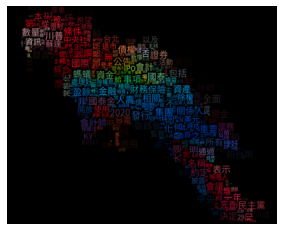

<Figure size 1800x1800 with 0 Axes>

In [57]:


import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude



with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    

Sentence = jieba.cut_for_search(d)    


terms = {}
for sentence in Sentence :
    if sentence in stops:
        continue
    
    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1  
        
        
dicition = Counter(terms)
# print(Counter(terms))





        
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular





icon = "colortest01"
icon_path = "%s.jpg" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255






wc = WordCloud(font_path="/Users/larry/Library/Fonts/SourceHanSansTW-Regular.otf", 
               mask = mask_color,
               max_font_size=45, 
               max_words = 2000 ,        
               stopwords= stops,
                margin=1,
              relative_scaling=0)     

wc.generate_from_frequencies(terms)
 


image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)


# 視覺化

plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(25,25))
plt.show()

# plt.savefig("Wordcloud.png")
wc.to_file("demo04.png")
